In [ ]:
"""Модуль посвящен теории множеств."""

В Python есть очень полезный тип данных для работы с множествами – это set. Об этом типе данных, примерах использования, и небольшой выдержке из теории множеств пойдёт речь далее.

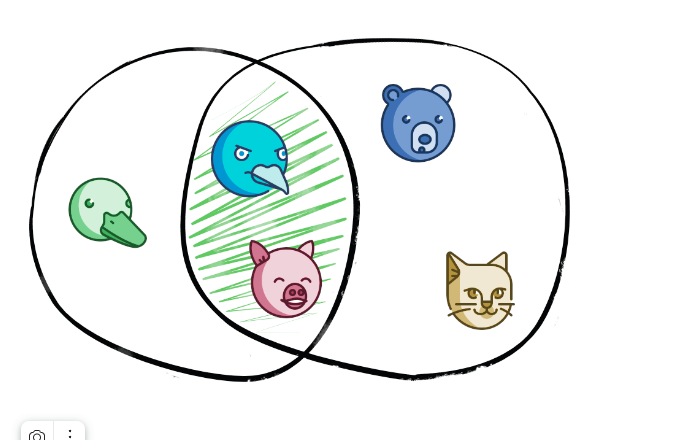

Множество

Множество – это математический объект, являющийся набором, совокупностью, собранием каких-либо объектов, которые называются элементами этого множества. Или другими словами:



Множество – это не более чем неупорядоченная коллекция уникальных элементов.

Что значит неупорядоченная? Это значит, что два множества эквивалентны, если содержат одинаковые элементы.

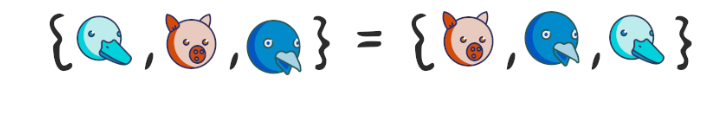

Элементы множества должны быть уникальными, множество не может содержать одинаковых элементов. Добавление элементов, которые уже есть в множестве, не изменяет это множество.

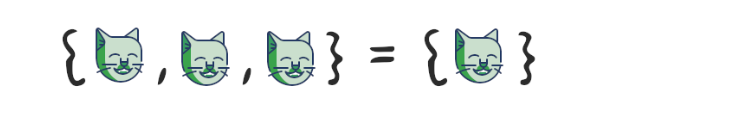

Множества, состоящие из конечного числа элементов, называются конечными, а остальные множества – бесконечными. Конечное множество, как следует из названия, можно задать перечислением его элементов. Так как темой этой статьи является практическое использование множеств в Python, то я предлагаю сосредоточиться на конечных множествах.



In [1]:
fruits = {"banana", "apple", "orange"}

Единственное ограничение, что таким образом нельзя создать пустое множество. Вместо этого будет создан пустой словарь:



In [28]:
wrong_empty_set: dict[float, str] = {}
print(type(wrong_empty_set))

<class 'dict'>


Для создания пустого множества нужно непосредственно использовать set():

In [31]:
correct_empty_set: set[str] = set()
print(type(correct_empty_set))

<class 'set'>


Также в set() можно передать какой-либо объект, по которому можно проитерироваться (Iterable):

In [33]:
color_list: list[str] = ["red", "green", "blue", "purple", "purple"]
color_set = set(color_list)
print(color_set)

{'green', 'purple', 'red', 'blue'}



Ещё одна возможность создания множества – это использование set comprehension. Это специальная синтаксическая конструкция языка, которую иногда называют абстракцией множества по аналогии с list comprehension (Списковое включение).

In [36]:
numbers: list[int] = [1, 2, 2, 2, 3, 3, 4, 4, 5, 6]
# Единственное отличие со списковыми включениями - это
# использование фигурных скобок виесто квадратных
even_numbers = {number for number in numbers if number % 2 == 0}
print(even_numbers)

{2, 4, 6}


Хешируемые объекты

Существует ограничение, что элементами множества (как и ключами словарей) в Python могут быть только так называемые хешируемые (Hashable) объекты. Это обусловлено тем фактом, что внутренняя реализация set основана на хеш-таблицах. Например, списки и словари – это изменяемые объекты, которые не могут быть элементами множеств. Большинство неизменяемых типов в Python (int, float, str, bool, и т.д.) – хешируемые. Неизменяемые коллекции, например tuple, являются хешируемыми, если хешируемы все их элементы.



In [40]:
# Множество кортежей (tuple)
records: set[tuple[str, int]] = {
    ("Москва", 17_200_000),
    ("Санкт - Петербург", 5_400_000),
    ("Новосибирск", 1_600_000),
    ("Москва", 17_200_000),
}
for city, population in records:
    print(city)

Москва
Новосибирск
Санкт - Петербург


Объекты пользовательских классов являются хешируемыми по умолчанию. Но практического смысла чаще всего в этом мало из-за того, что сравнение таких объектов выполняется по их адресу в памяти, т.е. невозможно создать два "равных" объекта.

Чтобы протокол хеширования работал без явных и неявных логических ошибок, должны выполняться следующие условия:

Хеш объекта не должен изменяться, пока этот объект существует

Равные объекты должны возвращать одинаковый хеш

Свойства множеств

Тип set в Python является подтипом Collection (про коллекции), из данного факта есть три важных следствия:

1) Определена операция проверки принадлежности элемента множеству
2) Можно получить количество элементов в множестве
3) Множества являются iterable-объектами


Принадлежность множеству

Проверить принадлежит ли какой-либо объект множеству можно с помощью оператора in. Это один из самых распространённых вариантов использования множеств. Такая операция выполняется в среднем за O(1) с теми же оговорками, которые существуют для хеш-таблиц.



In [45]:
tremendously_huge_set: set[str] = {"red", "green", "blue"}
if "green" in tremendously_huge_set:
    print("Green is there!")
else:
    print("Unfortunately, there is no green...")

if "purple" in tremendously_huge_set:
    print("Purple is there!")
else:
    print("Unfortunately, there is no purple...")

Green is there!
Unfortunately, there is no purple...


Мощность множества

Мощность множества – это характеристика множества, которая для конечных множеств просто означает количество элементов в данном множестве. Для бесконечных множеств всё несколько сложнее.

In [12]:
even_numbers = {i for i in range(100) if i % 2 == 0}
# Мощность мжножества
cardinality = len(even_numbers)
print(cardinality)

50


Перебор элементов множества


Как уже было отмечено выше, множества поддерживают протокол итераторов, таким образом любое множество можно использовать там, где ожидается iterable-объект.

In [14]:
colors: set[str] = {"red", "green", "blue"}
# Элементы множества можно перебрать с помощью цикла for
for color in colors:
    print(color)
# Множества можно использовать там, где ожидается iterable - объект
color_counter = dict.fromkeys(colors, 1)
print(color_counter)

blue
green
red
{'blue': 1, 'green': 1, 'red': 1}


Отношения между множествами

Между множествами существуют несколько видов отношений, или другими словами взаимосвязей. Давайте рассмотрим возможные отношения между множествами в этом разделе.

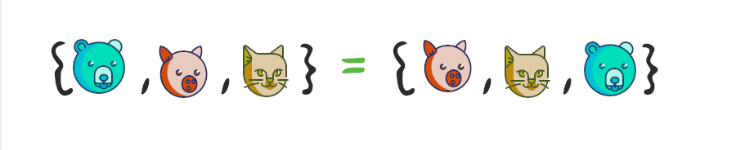

Тут всё довольно просто – два множества называются равными, если они состоят из одних и тех же элементов. Как следует из определения множества, порядок этих элементов не важен.

In [18]:
my_fruits = {
    "banana",
    "apple",
    "orange",
}
your_fruits = {"apple", "banana", "orange"}
print(my_fruits == your_fruits)

True


Непересекающиеся множества

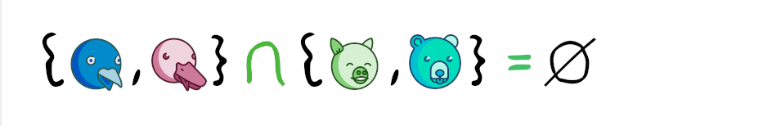

Если два множества не имеют общих элементов, то говорят, что эти множества не пересекаются. Или другими словами, пересечение этих множеств является пустым множеством.

In [19]:
even_numbers = {i for i in range(10) if i % 2 == 0}
odd_numbers = {i for i in range(10) if i % 2 == 1}
#  Очевидно, что множества чётных и нечётных чисел не пересекаются
if even_numbers.isdisjoint(odd_numbers):
    print("Множества не пересекаются!")

Множества не пересекаются!


Подмножество и надмножество

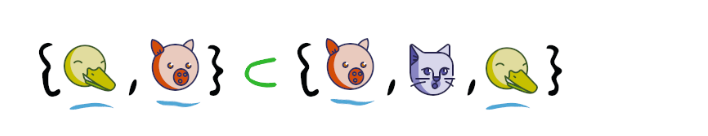

Подмножество множества S – это такое множество, каждый элемент которого является также и элементом множества S. Множество S в свою очередь является надмножеством исходного множества.

In [21]:
# Множество чисел Фибоначчи меньших 100
fibonacci_numbers: set[int] = {0, 1, 2, 3, 34, 5, 8, 13, 21, 55, 89}
# Множество натуральных чисел меньших 100
natural_numbers = set(range(100))
# Множество чисел Фибоначчи является подмножеством множества
# натуральных чисел
if fibonacci_numbers.issubset(natural_numbers):
    print("Подмножетсво")
# В свою очередь множетсво натуральных чисел является
# надмножетсвом множетсва чисел Фибоначи
if natural_numbers.issuperset(fibonacci_numbers):
    print("Надмножество")

Подмножетсво
Надмножество


Пустое множество является подмножеством абсолютно любого множества.